In [2]:
# Importando Pandas
import pandas as pd

In [3]:
# Visualizando dataset
treino = pd.read_csv("train.csv")
treino.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
# Usando uma ferramenta para explorar os dados de forma geral e de uma só vez
from ydata_profiling import ProfileReport
profile = ProfileReport(treino, title="Titanic_Train_Report")

In [5]:
# Gerando um report 
profile.to_file("Titanic_Train_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# Verificando as informações da base
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Verificando as informações da base de treino
treino.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

In [8]:
treino.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
teste = pd.read_csv("test.csv")
teste.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [10]:
# Verificando as informações da base de treino
teste.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

* Percebemos discrepância de dados ausentes entre as bases. Na base de treino há dados ausentes diferentes da base de teste. Ou seja, temos colunas que possuem valores vazinos na base de teste que não estão vazias na base de treino ("Fare", por exemplo). Precisamos tratar as bases.

### Tratamentos iniciais

In [11]:
# Verificando novamente os valores ausentes em Treino
treino.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [12]:
# De 891 linhas, temos 687 missing values para coluna "Cabin"
treino.shape

(891, 12)

* As colunas "PassengerId", "Ticket", "Cabin", e "Name", apresentam alta cardinalidade (alta quantidade de valores distintos), além de algumas serem strings. Isso dificulta o processamento dos dados pelo modelo pois não favorece a generalização buscada por ele. Portanto, descartaremos tais colunas.

In [13]:
# Cardinalida
treino.nunique().sort_values(ascending=False)

PassengerId    891
Name           891
Ticket         681
Fare           248
Cabin          147
Age             88
SibSp            7
Parch            7
Pclass           3
Embarked         3
Survived         2
Sex              2
dtype: int64

In [14]:
# Eliminando algumas colunas em ambos datasets 
treino = treino.drop(["Name", "Ticket", "Cabin"], axis=1)
teste = teste.drop(["Name", "Ticket", "Cabin"], axis=1)

* Precisamos tratar os NaN values na coluna "Age" pois todos os passajeiros tinham algum valor de idade. Usaremos a média como substituição.

In [15]:
# Verificando a média de idade
treino["Age"].mean()

29.69911764705882

In [16]:
# Selecionando as linhas com idade vazia e substituindo pela média
treino.loc[treino["Age"].isnull()]

PassengerId  Survived  Pclass     Sex  Age  SibSp  Parch     Fare  \
5              6         0       3    male  NaN      0      0   8.4583   
17            18         1       2    male  NaN      0      0  13.0000   
19            20         1       3  female  NaN      0      0   7.2250   
26            27         0       3    male  NaN      0      0   7.2250   
28            29         1       3  female  NaN      0      0   7.8792   
..           ...       ...     ...     ...  ...    ...    ...      ...   
859          860         0       3    male  NaN      0      0   7.2292   
863          864         0       3  female  NaN      8      2  69.5500   
868          869         0       3    male  NaN      0      0   9.5000   
878          879         0       3    male  NaN      0      0   7.8958   
888          889         0       3  female  NaN      1      2  23.4500   

    Embarked  
5          Q  
17         S  
19         C  
26         C  
28         Q  
..       ...  
859        C  
863        S  
868        S  
878        S  
888        S  

[177 rows x 9 columns]

In [17]:
# Substituindo NaN pela média
treino.loc[treino["Age"].isnull(),"Age"] = treino["Age"].mean()
teste.loc[teste["Age"].isnull(),"Age"] = teste["Age"].mean()

* Constatamos que há 2 missing values na coluna "Embarked" e o valor mais frequente é "S". Faremos o tratamento através da substituição pela moda.

In [18]:
treino.loc[treino["Embarked"].isnull(),"Embarked"]

61     NaN
829    NaN
Name: Embarked, dtype: object

In [19]:
treino["Embarked"].mode()[0]

'S'

In [20]:
#Substituindo valores pela moda 
treino.loc[treino["Embarked"].isnull(),"Embarked"] = treino["Embarked"].mode()[0]

* Constatamos também que há 1 missing values na coluna "Fare" para a base de teste. Faremos o tratamento através da substituição pela média.

In [21]:
teste.loc[teste["Fare"].isnull(),"Fare"]

152   NaN
Name: Fare, dtype: float64

In [22]:
# Substituindo pela média
teste.loc[teste["Fare"].isnull(),"Fare"] = teste["Fare"].mean()

* Verificando se ainda existem NaN values em ambos datasets

In [23]:
treino.isnull().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
teste.isnull().sum().sort_values(ascending=False)

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Considerando apenas as colunas que não são texto

In [25]:
# Verificando as colunas de texto na base de treino 
treino.columns[treino.dtypes != "object"]

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [26]:
# Selecionando apenas as colunas com valores numéricos na base treino
treino_nr = treino.loc[:,treino.columns[treino.dtypes != "object"]]

In [27]:
# Selecionando apenas as colunas com valores numéricos na base teste
teste_nr = teste.loc[:,teste.columns[teste.dtypes != "object"]]

#### Podemos, agora, selecionar um modelo para classificar esses dados
* Vamos utilizar os seguintes modelos:
    * Árvore de classificação (https://scikit-learn.org/stable/modules/tree.html#classification)
    * K-NN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier)
    * Regressão Logística (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

* Separação da base de treino em treino e validação

In [28]:
# Importando o train_test_split
from sklearn.model_selection import train_test_split

In [29]:
X = treino_nr.drop(["Survived", "PassengerId"], axis=1)
y = treino["Survived"]

In [30]:
# Separando em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

### Árvore de classificação

In [31]:
from sklearn import tree
clf_dtc = tree.DecisionTreeClassifier(random_state=42)
clf_dtc = clf_dtc.fit(X_train, y_train)
clf_dtc.predict(X_val)
y_pred_dtc = clf_dtc.predict(X_val)

### K-Neighbors Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn = clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_val)

### Regressão Logística

In [33]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=42)
clf_lr = clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_val)

### Finalmente, vamos avaliar cada um dos três modelos escolhidos quanto à acurácia (única métrica avaliada na competição Kaggle)
* Acurácia (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score)
* Matriz de confusão (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [34]:
# Importando
from sklearn.metrics import accuracy_score

In [35]:
# Para a árvore de decisão
accuracy_score(y_val, y_pred_dtc)

0.6169491525423729

In [36]:
# Para K-NN
accuracy_score(y_val, y_pred_knn)

0.6542372881355932

In [37]:
# Para Regressão Logística
accuracy_score(y_val, y_pred_lr)

0.7254237288135593

In [38]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix

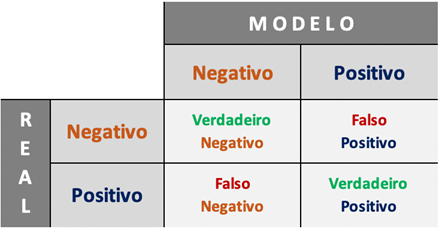

In [39]:
# Para a árvore de decisão
confusion_matrix(y_val, y_pred_dtc)

array([[125,  50],
       [ 63,  57]], dtype=int64)

In [40]:
# Para K-NN
confusion_matrix(y_val, y_pred_knn)

array([[133,  42],
       [ 60,  60]], dtype=int64)

In [41]:
# Para Regressão Logística
confusion_matrix(y_val, y_pred_lr)

array([[156,  19],
       [ 62,  58]], dtype=int64)

### Fazendo as previsões para os dados de teste

In [42]:
# Visualizando X_train
X_train.head(3)

Pclass        Age  SibSp  Parch     Fare
6         1  54.000000      0      0  51.8625
718       3  29.699118      0      0  15.5000
685       2  25.000000      1      2  41.5792

In [43]:
# Visualizando base teste com dados numéricos
teste_nr.head(3)

PassengerId  Pclass   Age  SibSp  Parch    Fare
0          892       3  34.5      0      0  7.8292
1          893       3  47.0      1      0  7.0000
2          894       2  62.0      0      0  9.6875

In [44]:
# Excluindo coluna PassengerId para a base de teste ser igual a base de treino
X_teste = teste_nr.drop(["PassengerId"], axis=1)

In [45]:
#Utilizando a Regressão Logística na base de teste
y_pred = clf_lr.predict(X_teste)

In [46]:
# Criação de uma nova coluna com a previsão na base de teste
teste["Survived"] = y_pred

In [47]:
# Criando base para submissão na competição Kaggle
base_envio = teste[["PassengerId","Survived"]]
base_envio.to_csv("resultados.csv", index=False)

### Precisamos melhorar a acurácia. Melhoraremos ao longo do estudo dos algoritmos e modificação de seus hiperparâmetros